# Milestone 2: Data Modeling

### Soheil Dejnabadi (PSID: 1937584)

###### Purpose of Data Modeling

In our first milestone, we explored the Kaggle: Home Loan Approval Dataset with the intention of preparing ourselves to create an automated process that is capable of predicting a
homeowner's likelihood of home loan elgibility. Additionally, we evaluated the relevance of each variable and removed any unnecessary variables that did not correlate with the rest of our data.

In this second milestone, we are going to test different types of machine learning models that can help us predict home loan eligibility and evaluate how well each model did at predicting the
label. The models will take in the loaning candidate's qualities, which were explored in the last milestone, and respond with a label, "Yes" or "No". Thus, we are going to use our knowledge of
various supervised classification machine learning models to compare modeling performances and find the most optimal one to use as our final model. The models we are exploring are:

1. K-Nearest Neighbor (KNN)
2. Support Vector Machines (SVM)
3. Naive Bayes Classifier
4. Decision Tree Classifier

To begin, we will import our libraries and cleaned data.


In [1]:
 #libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#cleaned training set
loan_train = pd.read_csv('loan_train_clean.csv')
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,Urban,Y


Looking at the top five rows of our dataset above, we note that there are string data types in our data set, which will make our machine learning process difficult! So, we will change all of those variables to integer data types to perform our modeling more easily by making dummy variables.

In [3]:
#for 'Dependents', if '3+', change to 3:
loan_train['Dependents'] = loan_train['Dependents'].replace(['3+'], '3')
loan_train['Dependents'] = loan_train['Dependents'].astype(float)

#change variables to dummies: 
loan_train.Gender.loc[loan_train.Gender == 'Male'] = 1
loan_train.Gender.loc[loan_train.Gender == 'Female'] = 0

loan_train.Married.loc[loan_train.Married == 'Yes'] = 1
loan_train.Married.loc[loan_train.Married == 'No'] = 0

loan_train.Education.loc[loan_train.Education == 'Graduate'] = 1
loan_train.Education.loc[loan_train.Education == 'Not Graduate'] = 0

loan_train.Self_Employed.loc[loan_train.Self_Employed == 'Yes'] = 1
loan_train.Self_Employed.loc[loan_train.Self_Employed == 'No'] = 0

loan_train.Property_Area.loc[loan_train.Property_Area == 'Rural'] = 0
loan_train.Property_Area.loc[loan_train.Property_Area == 'Semiurban'] = 1
loan_train.Property_Area.loc[loan_train.Property_Area == 'Urban'] = 2

loan_train.Loan_Status.loc[loan_train.Loan_Status == 'Y'] = 1
loan_train.Loan_Status.loc[loan_train.Loan_Status == 'N'] = 0

print(loan_train)


      Loan_ID Gender Married  Dependents Education Self_Employed  \
0    LP001003      1       1         1.0         1             0   
1    LP001005      1       1         0.0         1             1   
2    LP001006      1       1         0.0         0             0   
3    LP001008      1       0         0.0         1             0   
4    LP001011      1       1         2.0         1             1   
..        ...    ...     ...         ...       ...           ...   
385  LP002974      1       1         0.0         1             0   
386  LP002978      0       0         0.0         1             0   
387  LP002983      1       1         1.0         1             0   
388  LP002984      1       1         2.0         1             0   
389  LP002990      0       0         0.0         1             1   

     Applicant_Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0              4583.0              1508.0        128.0             360.0   
1              3000.0          

We still have a classification variable leftover which is our "Loan_ID". It is not necessary when we do our modeling, so we can drop this column.

In [4]:
#drop ID column, not useful here:
loan_train = loan_train.drop(['Loan_ID'], axis = 1)
loan_train = loan_train.astype(int)

#let's look at how our model looks now:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508,128,360,0,0
1,1,1,0,1,1,3000,0,66,360,2,1
2,1,1,0,0,0,2583,2358,120,360,2,1
3,1,0,0,1,0,6000,0,141,360,2,1
4,1,1,2,1,1,5417,4196,267,360,2,1


### 1. K-Nearest Neighbor (KNN)

The first model we are choosing to explore is K-Nearest Neighbors. The benefits of this model is that it is simple and intuitive of the models, with a relatively high accuracy. With its common use
in data science, we found that this was the most logical model to begin with. We will import our libraries, separate our variables from our classification variable (the approval or non-approval of
the home loan inquiry), and initiate the model.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#separate features from label
y = loan_train['Loan_Status']
x = loan_train.drop(columns=['Loan_Status'])

#split into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Training set shape: ", x_train.shape, y_train.shape)
print("Testing set shape: " , x_test.shape, y_test.shape)


Training set shape:  (312, 10) (312,)
Testing set shape:  (78, 10) (78,)


We will first explore which k values will be best for our model. Let's try 30 k-values and see how the accuracy is. Then, we will graph it so that we can more easily visualize the changes in accuracy.


In [6]:
 mean_acc = np.zeros(30)
    
for i in range(1,31):
     #train model + predict 
     knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
     y_hat = knn.predict(x_test)
     mean_acc[i-1] = metrics.accuracy_score(y_test, y_hat)
    
print(mean_acc)


[0.57692308 0.56410256 0.65384615 0.6025641  0.73076923 0.73076923
 0.75641026 0.71794872 0.74358974 0.71794872 0.74358974 0.74358974
 0.75641026 0.73076923 0.74358974 0.73076923 0.79487179 0.79487179
 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179
 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179]


<function matplotlib.pyplot.show(close=None, block=None)>

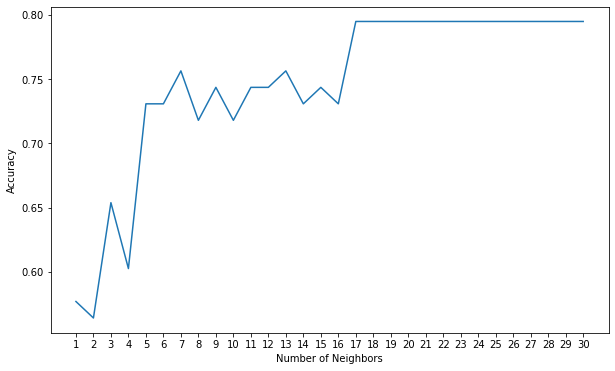

In [7]:
loc = np.arange(1, 31, step = 1.0)

plt.figure(figsize = (10,6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show


Based on our graph, it looks like when our number of neighbors, k, equals 17 or more, the accuracy is the best. So, we will tune the model to find the best performing one, using a variety of
these k-values.


##### Hyperparameter Tuning


In [8]:
#hyperparameters to be tuned
grid_params = {'n_neighbors': [17,20,23,26,29,31],
     'weights': ['uniform', 'distance'],
     'metric': ['minkowski', 'euclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [9]:
print('The best parameters for this model is: ', g_res.best_params_)
print('The accuracy score of these parameters are: ', g_res.best_score_)

The best parameters for this model is:  {'metric': 'minkowski', 'n_neighbors': 29, 'weights': 'distance'}
The accuracy score of these parameters are:  0.7243589743589743


The best performing model results in an accuracy of about 72%. Let's use these hyperparameters for our KNN model!

In [10]:
#let's use the best hyperparameters: 
best_knn = KNeighborsClassifier(n_neighbors = 29, weights = 'distance',
                 metric = 'minkowski')
best_knn.fit(x_train, y_train)

best_y_hat = best_knn.predict(x_train)
best_y = best_knn.predict(x_test)

##### Model Performance Evaluation

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, best_y)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[0,0])
print('\nTrue Negatives(TN) = ', conf_mat[1,1])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])
print(classification_report(y_test,best_y))


Confusion matrix

 [[ 0 16]
 [ 7 55]]

True Positives(TP) =  0

True Negatives(TN) =  55

False Positives(FP) =  16

False Negatives(FN) =  7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.77      0.89      0.83        62

    accuracy                           0.71        78
   macro avg       0.39      0.44      0.41        78
weighted avg       0.62      0.71      0.66        78



From the final model evaluation, we see that the model's precision is about 77% which is quite good. A total of 23 out of our 78 loan statuses were labeled incorrectly. We would prefer a higher
accuracy, if possible, so we will attempt another model.


### 2. Support Vector Machines (SVM)

Another model, similar to KNN, is the Support Vector Machine Learning Model (SVM). This model improves its classification of data points by sacrificing some misclassifications in training to
better classify the rest of the model. Thus, there is less variance in individual observations. With this approach, it may result in better model performance. Let's initiate this model:


In [14]:
from sklearn.svm import SVC

# instantiate the model with default parameters
model = SVC()

# fit/train 
model.fit(x_train,y_train)

SVC()

In [15]:
predictions = model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[ 0 16]
 [ 0 62]]

True Positives(TP) =  0

True Negatives(TN) =  62

False Positives(FP) =  16

False Negatives(FN) =  0


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.79      1.00      0.89        62

    accuracy                           0.79        78
   macro avg       0.40      0.50      0.44        78
weighted avg       0.63      0.79      0.70        78



From our initial attempt at the SVM model, we see that our model has misclassified 16 observations. We will see if tuning the model will improve our model performance.


##### Hyperparameter Tuning

In SVM, we uniquely have a C variable, which acts as the "budget" in which the violations of misclassifcation can occur. As the C value increases, we are more tolerant of these violations. Gamma
is the parameter of our radial (non-linear) kernel. If our gamma is small, the curvature of the decision boundary is low and has a broad decision region.


In [18]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [20]:
#let's find the best combination of parameters:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
print("The best parameters for SVM are: ", grid.best_params_)

The best parameters for SVM are:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


##### Model Performance Evaluation

Using these best performing parameters, we will evaluate its final performance.

In [22]:
grid_predictions = grid.predict(x_test)

In [23]:
conf_mat = confusion_matrix(y_test,grid_predictions)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[0,0])
print('\nTrue Negatives(TN) = ', conf_mat[1,1])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])

print(classification_report(y_test,grid_predictions))

Confusion matrix

 [[ 1 15]
 [ 8 54]]

True Positives(TP) =  1

True Negatives(TN) =  54

False Positives(FP) =  15

False Negatives(FN) =  8
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.78      0.87      0.82        62

    accuracy                           0.71        78
   macro avg       0.45      0.47      0.45        78
weighted avg       0.64      0.71      0.67        78



Looking at our accuracy, we see that the model performs with a 78% accuracy. Out of 78 observations, 23 loan statuses were classified incorrectly. We conclude that the SVM model performed
similarly to the KNN model.

### 3. Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

We can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels.

In [25]:
y_pred = gnb.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7821


Compare the train set and test set accuracy:

In [27]:
y_pred_train = gnb.predict(x_train)

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.7083
Test set score: 0.7821


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 1 15]
 [ 2 60]]

True Positives(TP) =  1

True Negatives(TN) =  60

False Positives(FP) =  15

False Negatives(FN) =  2


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.80      0.97      0.88        62

    accuracy                           0.78        78
   macro avg       0.57      0.52      0.49        78
weighted avg       0.70      0.78      0.72        78



##### Model Performance Evaluation

In [30]:
from sklearn.model_selection import cross_val_score

# Applying 10 Fold Cross Validation
scores = cross_val_score(gnb, x_train, y_train, cv = 3, scoring='accuracy')
print('Cross validation scores:{}'.format(scores))

# compute Average cross validation score
print('\nAverage cross validation score: {:.4f}'.format(scores.mean()))

Cross validation scores:[0.70192308 0.69230769 0.64423077]

Average cross validation score: 0.6795


Using the mean cross‑validation, we can conclude that we expect the model to be around 68% accurate on average. This resulting accuracy is poor in comparison to that of the SVM and KNN
models. Thus, we will likely not use this approach to create our final model.

### 4. Decision Tree Classifier

The 4th and last model we decided to implement was the decision tree. Decision Trees are by far the easiest models to understand and interpret, since the branches show what decisions are
made. They are able to handle noise that might be potential outliers. They are able to identify the most important features to ensure the most accurate model exists.


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

y = loan_train['Loan_Status']
x = loan_train.drop(columns=['Loan_Status'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
dtc = DecisionTreeClassifier()

#dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
tree_rules = export_text(dtc, feature_names=list(x.columns))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(tree_rules)


Accuracy: 67.95%
|--- Applicant_Income <= 1519.00
|   |--- Property_Area <= 0.50
|   |   |--- Coapplicant_Income <= 2286.50
|   |   |   |--- class: 0
|   |   |--- Coapplicant_Income >  2286.50
|   |   |   |--- class: 1
|   |--- Property_Area >  0.50
|   |   |--- class: 0
|--- Applicant_Income >  1519.00
|   |--- Property_Area <= 0.50
|   |   |--- Coapplicant_Income <= 5031.50
|   |   |   |--- Coapplicant_Income <= 2912.50
|   |   |   |   |--- Coapplicant_Income <= 2550.00
|   |   |   |   |   |--- Coapplicant_Income <= 1758.00
|   |   |   |   |   |   |--- Loan_Amount <= 106.00
|   |   |   |   |   |   |   |--- Coapplicant_Income <= 1355.50
|   |   |   |   |   |   |   |   |--- Loan_Amount <= 58.50
|   |   |   |   |   |   |   |   |   |--- Loan_Amount <= 47.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Loan_Amount >  47.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Loan_Amount >  58.50
|   | 

##### Hyperparameter Tuning & Model Performance
As we see here, the tree gives us an accuracy score mainly around 60-70%, but our tree has way too many branches. The whole point of decision trees are the simplicity and easy to understand
model. In the next lines of code, we will reduce the branches so that only 3 main branches are present.

In [44]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
tree_rules = export_text(dtc, feature_names=list(x.columns))
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(tree_rules)


Accuracy: 79.49%
|--- Applicant_Income <= 1519.00
|   |--- Property_Area <= 0.50
|   |   |--- Applicant_Income <= 587.50
|   |   |   |--- class: 0
|   |   |--- Applicant_Income >  587.50
|   |   |   |--- class: 1
|   |--- Property_Area >  0.50
|   |   |--- class: 0
|--- Applicant_Income >  1519.00
|   |--- Property_Area <= 0.50
|   |   |--- Coapplicant_Income <= 5031.50
|   |   |   |--- class: 1
|   |   |--- Coapplicant_Income >  5031.50
|   |   |   |--- class: 0
|   |--- Property_Area >  0.50
|   |   |--- Coapplicant_Income <= 94.50
|   |   |   |--- class: 1
|   |   |--- Coapplicant_Income >  94.50
|   |   |   |--- class: 1



Not only is our tree way easier to understand, but we were able to reach an accuracy score of around 80%, which is much higher than the original tree. Our decision tree identifies that Applicant
Income is the biggest indicator for Loan Status. We are more likely to choose this model in our final classification. However, we could be more confident in our model with more tuning with the
number of branches which will ensure that we are not experiencing overfitting.

#### Model Comparison & Conclusions

In comparing our various models, we see that the best performing model was the Decision Tree Classifier. The resulting accuracy was about 80%, which is respectable for our model. However,
something we could be critical about is its inflexibility -- a change in the data structure could completely flip this result -- and the lack of tuning various number of branches to ensure the best
fit. Thus, we are weary to trust this accuracy report.


Another important observation to note is the similarity in performance of the SVM and KNN model. Both of these models result in an accuracy of about 77-78% after tuning its
hyperparameters, which is close to the performance of the Decision Tree classifier. The accuracy results is quite similar to the Decision Tree Classifier, and a pro of these models is that its
classification was more parameters were tuned, ensuring a confidence in fitting the model and future data that the company could use to classify their clients. Therefore, when we consider
automating this home loaning process, we would prefer flexible models like KNN and SVM to ensure that the models can move with the company's growth in customers.